In [37]:
# Compare important quantities for sphere,cyl,quartz
# Contact Angle
# Mono Radius
# Bulk Radius
# Number of Monolayer Atoms
# Droplet Height
# Average Dipole

In [38]:
#Import
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


/home/oge1/.local/miniconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [39]:
#Directories
prefix='$SCRATCH/droplet/results/'
dirs={'sph':'finalResults/avg/',
      'cyl':'Bob/Sub951By50/finalResults/avg/',
      'prewet_both':'Bob/Prewet/Both/finalResults/avg/',
      'prewet_old':'Bob/Prewet/Old/finalResults/avg/',
      'prewet_new':'Bob/Prewet/New/finalResults/avg/',
      #'fullcyl':'Bob/Sub951By50/finalResults/water_shift/fullcyl_avg/',
      'quartz':'Bob/Quartz/240By240/finalResults/avg/'}
for k in dirs.keys():
    dirs[k]=prefix+dirs[k]

#Set dir
os.chdir(prefix)

In [40]:
#Get data
groups=list(dirs.keys())
file_names=['contactAngle','monoEdge','bulkEdge','nMono','dropletHeight','avgDipole']
aliases=['ca','mr','br','nm','h','ad']
quantity_names=['Contact Angle','Monolayer Radius','Bulk Radius','Number in Monolayer',
                'Droplet Height','Average Dipole Moment']

data={}
axlims={}
sims={'cyl':['100A','20A','30A','40A','50A','60A'],
     'sph':['20A','30A','40A','50A','60A'],
      'prewet_both':['20A_20AonMonolayer','30A_20AonMonolayer','30A_30AonMonolayer'],
      'prewet_old':['20A_20AonMonolayer','30A_20AonMonolayer','30A_30AonMonolayer'],
      'prewet_new':['20A_20AonMonolayer','30A_20AonMonolayer','30A_30AonMonolayer'],
      'fullcyl':['20A','30A'],
     'quartz':['30A','35A','40A','45A','50A']}

maxvals = [1,300,150,10000,200,2000000]

#Create dict of dicts containing arrays
for g in groups:
    data[g]={}
    
    #Set axis plot limits
    axlims[g]={}
    for a in aliases:
        axlims[g][a]=[0,0]

    #Save data
    for i,f in enumerate(file_names):
        data[g][aliases[i]]=genfromtxt(dirs[g]+f+'.txt')
    
    #Extract & save time data
    data[g]['t']=data[g]['ca'][:,0]
    
    #Volume of droplet bulk
    #Sphere:
    #V_cap=pi*h/6*(3a^2+h^2)
    #Where a=bulk radius
    data[g]['v']=copy(data[g]['h'])
    data[g]['v'][:,1:]=pi*data[g]['h'][:,1:]/6*(3*data[g]['br'][:,1:]**2+data[g]['h'][:,1:]**2)

In [41]:
x = [1,2,6,3]

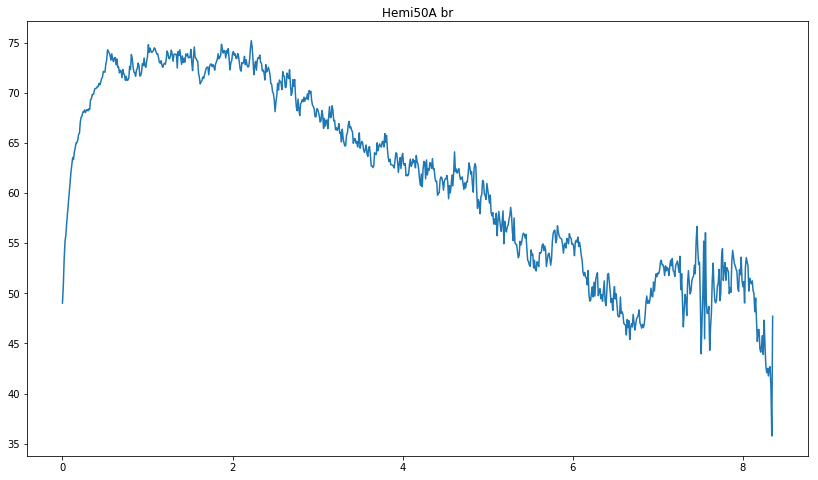

In [42]:
# Hemisphere
figure(figsize=[14,8])
ax = gca()

hemdata = genfromtxt('Hemi50A/avgStepData.txt')
cols = ['br','mr','ca','h','ar','ad','mx','my','mz','ma','flux','dmrdt','nmono','chi2']
alias = 'br'
colnum = cols.index(alias)+1

#Extract time
t=hemdata[:,0]/1e6

#Number of sims
n_sims=len(sims[g])

# Which data to plot
whichvals = hemdata[:,colnum] > 0
ax.plot(t[whichvals],hemdata[whichvals,colnum])
ax.set_title('Hemi50A {}'.format(alias))

# Plot limits
#ylim(.5,1)

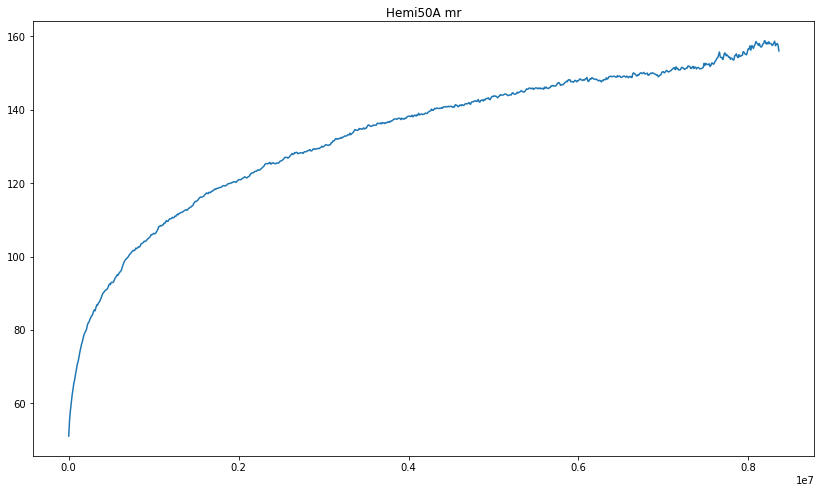

In [43]:
# Hemisphere
figure(figsize=[14,8])
ax = gca()

hemdata = genfromtxt('Hemi50A/avgStepData.txt')
cols = ['br','mr','ca','h','ar','ad','mx','my','mz','ma','flux','dmrdt','nmono','chi2']
alias = 'mr'
colnum = cols.index(alias)+1

#Extract time
t=hemdata[:,0]

#Number of sims
n_sims=len(sims[g])

# Which data to plot
whichvals = hemdata[:,colnum] > 0
ax.plot(t[whichvals],hemdata[whichvals,colnum])
ax.set_title('Hemi50A {}'.format(alias))

# Plot limits
#ylim(.5,1)

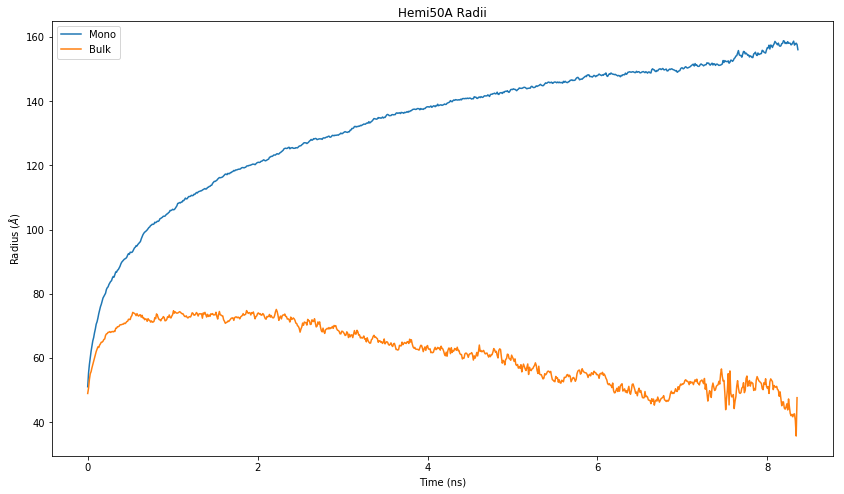

In [44]:
# Hemisphere
fig = figure(figsize=[14,8])
ax = gca()

hemdata = genfromtxt('Hemi50A/avgStepData.txt')
cols = ['br','mr','ca','h','ar','ad','mx','my','mz','ma','flux','dmrdt','nmono','chi2']
alias1 = 'mr'
colnum = cols.index(alias)+1
mrcol = cols.index('mr')+1
brcol = cols.index('br')+1


#Extract time
t=hemdata[:,0]/1e6

#Number of sims
n_sims=len(sims[g])

# Which data to plot
mrwhichvals = hemdata[:,mrcol] > 0
ax.plot(t[mrwhichvals],hemdata[mrwhichvals,mrcol],label='Mono')
brwhichvals = hemdata[:,brcol] > 0
ax.plot(t[brwhichvals],hemdata[brwhichvals,brcol],label='Bulk')
ax.set_title('Hemi50A Radii')
legend()
xlabel('Time (ns)')
ylabel('Radius ($\AA$)')

savefig('$SCRATCH/droplet/python/results/Hemi50ABulkMono.png')

# Plot limits
#ylim(.5,1)

In [45]:
pwd

'$SCRATCH/droplet/results'

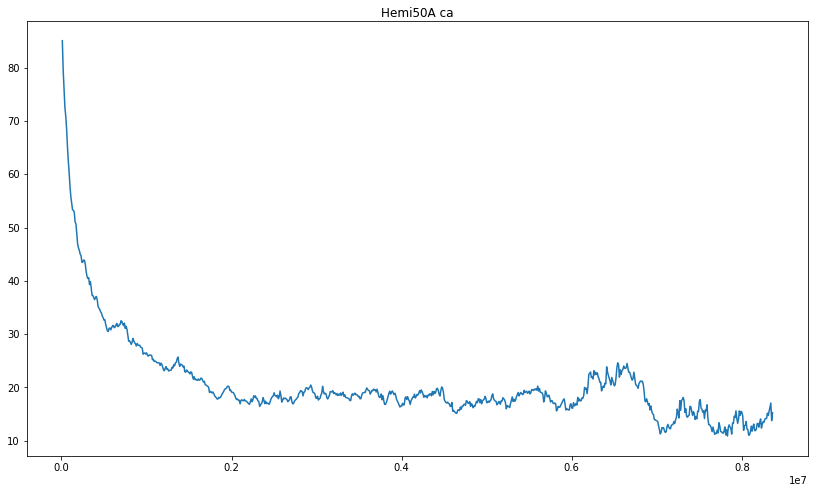

In [46]:
# Hemisphere
figure(figsize=[14,8])
ax = gca()

hemdata = genfromtxt('Hemi50A/avgStepData.txt')
cols = ['br','mr','ca','h','ar','ad','mx','my','mz','ma','flux','dmrdt','nmono','chi2']
alias = 'ca'
colnum = cols.index(alias)+1

#Extract time
t=hemdata[:,0]

#Number of sims
n_sims=len(sims[g])

# Which data to plot
whichvals = hemdata[:,colnum] > 0
ax.plot(t[whichvals],180/pi*arccos(hemdata[whichvals,colnum]))
ax.set_title('Hemi50A {}'.format(alias))

# Plot limits
#ylim(.5,1)

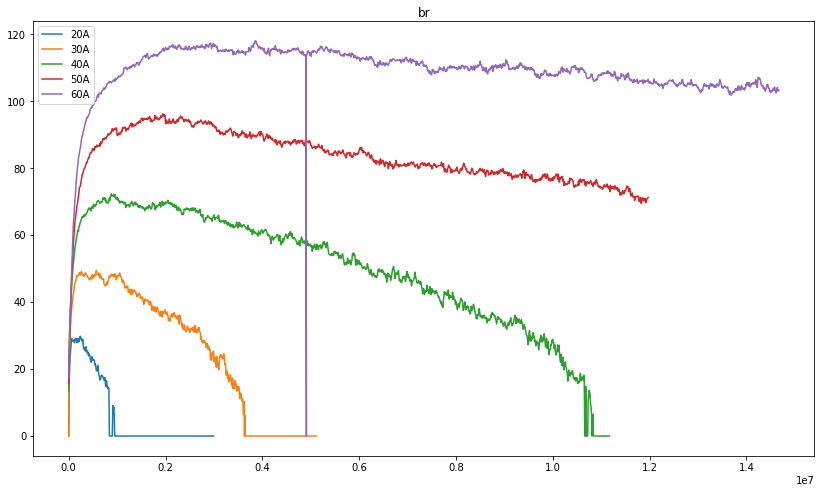

In [47]:
figure(figsize=[14,8])
ax = gca()

# Choose simulation
g = 'sph'

#Extract time
t=data[g]['t']

#Number of sims
n_sims=len(sims[g])

# Which data to plot
alias = 'br'
for i in range(n_sims):
    whichvals = data[g][alias][:,i+1] > -1
    ax.plot(t[whichvals],data[g][alias][whichvals,i+1],label=sims[g][i])
ax.set_title(alias)

# Plot limits
#ylim(.5,1)

legend()

## Try to find a simple correlation between variables

Already have that $r_m = e^\beta t^\alpha$.

In [48]:
# Linear least squares
def lin_ls(xx,yy):
    # Set up system
    A = array([[sum(xx**2),sum(xx)],[sum(xx),len(xx)]])
    b = array([sum(xx*yy),sum(yy)])
    
    # Solve system using numpy.linalg.lstsq
    mm,bb = lstsq(A,b)[0]
    
    return mm,bb

In [84]:
# Plot one quantity as a function of another
# alias_x - quantity to plot on x axis
# alias_y - quantity to plot on y ayis
# f_x - modify x quanity before plotting
# f_y - modify y quanity before plotting
def plot_2q(alias_x,alias_y,
            f_x=lambda x: x,f_y=lambda x: x,
            g='sph',ax=None):
    
    if(ax==None):
        figure(figsize=[14,8])
        ax = gca()

    #Number of sims
    n_sims=len(sims[g])
    
    #Extract time
    t=data[g]['t']
    
    # Which data to plot
    for i in [range(n_sims)[-1]]:
        whichvals = data[g][alias][:,i+1] < 2e6
        # Plot data
        if(alias_x=='t'):
            x = f_x(t[whichvals])
            ax.plot(f_x(t[whichvals]),
                    f_y(data[g][alias_y][whichvals,i+1]),
                    label=sims[g][i])
        else:
            x = f_x(data[g][alias_x][whichvals,i+1])   
            ax.plot(f_x(data[g][alias_x][whichvals,i+1]),
                    f_y(data[g][alias_y][whichvals,i+1]),
                    label=sims[g][i])
            
        #y = f_y(data[g][alias_y][whichvals,i+1])
        # Fit data
        #mm, bb = lin_ls(x,y)
        
        #print("slope = {}".format(mm))
        #print("intercept = {}".format(bb))
        
        # Plot linear fit
        #plot(x,mm*x+bb,'--',lw=3)
                        
            
    ax.set_title('{} vs. {}'
                 .format(alias_x,alias_y))
    
    ax.set_xlabel(alias_x)
    ax.set_ylabel(alias_y)

(80, 120)

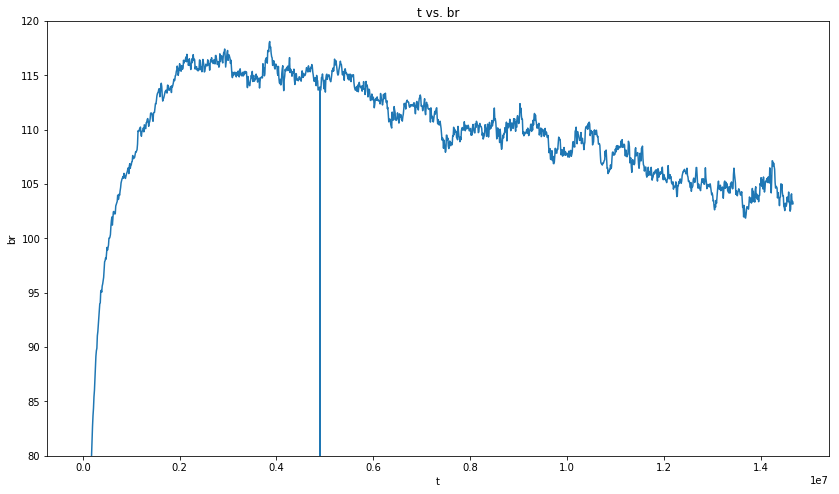

In [86]:
plot_2q('t','br')
ylim(80,120)

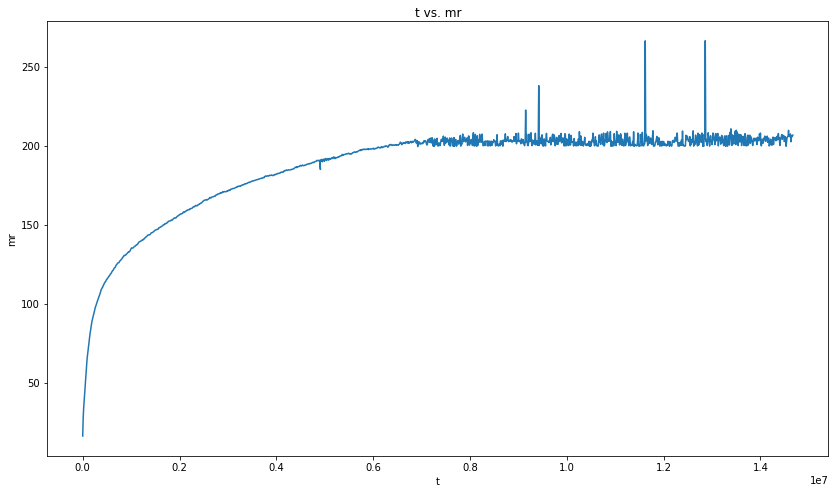

In [88]:
plot_2q('t','mr')

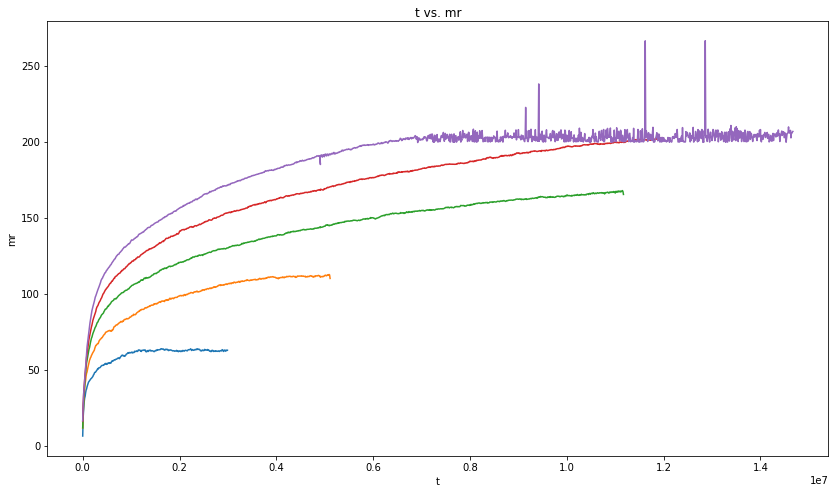

In [81]:
plot_2q('t','mr',
       lambda x: x,
       lambda y: y)

## Running averaging & contact angle / speed plots

In [82]:
# Thanks to Jamie http://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

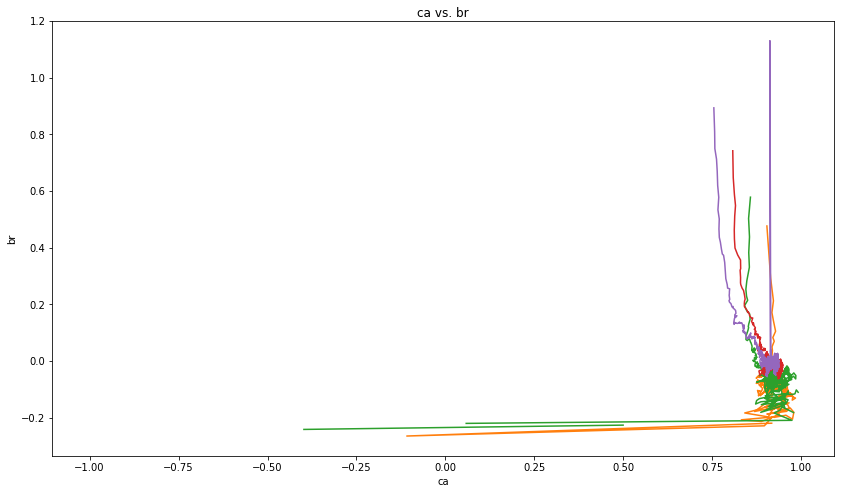

In [83]:
n = 100
plot_2q('ca','br',
      lambda x: x[n:],
      lambda y: diff(moving_average(y,n)))

In [15]:
# Linear least squares
def lin_ls(xx,yy):
    # Set up system
    A = array([[sum(xx**2),sum(xx)],[sum(xx),len(xx)]])
    b = array([sum(xx*yy),sum(yy)])
    
    # Solve system using numpy.linalg.lstsq
    mm,bb = lstsq(A,b)[0]
    
    return mm,bb

slope = -3.329244307888761e-08
intercept = 0.24579991035489612


(-1, 1)

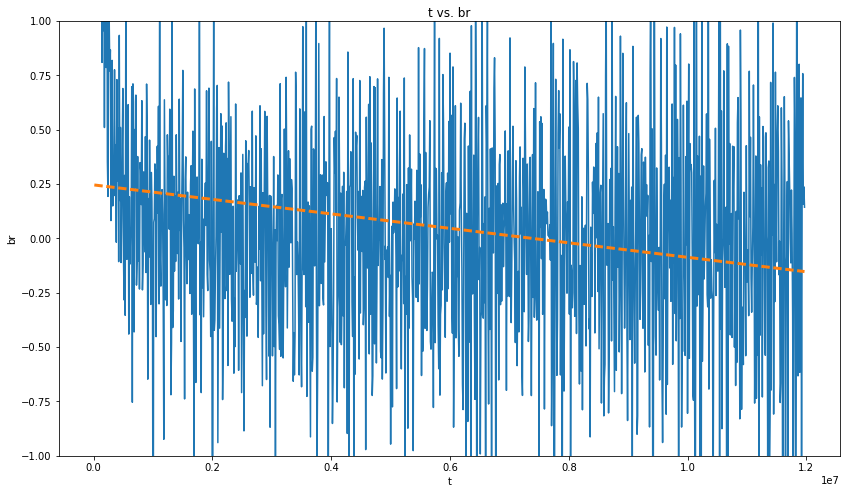

In [16]:
plot_2q('t','br',
       lambda x: x[1:],
       lambda y: diff(y))

ylim(-1,1)

slope = -3.329244307888761e-08
intercept = 0.24579991035489612


(-1, 1)

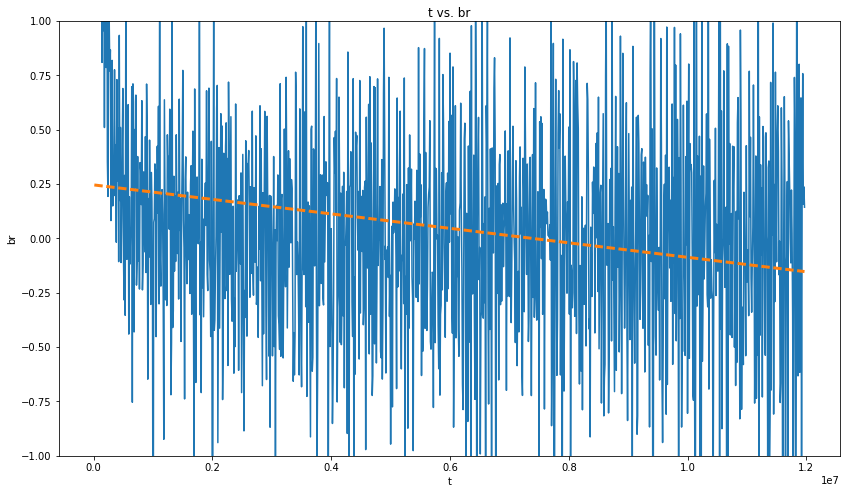

In [17]:
plot_2q('t','br',
       lambda x: x[1:],
       lambda y: diff(y))

ylim(-1,1)

slope = 0.5073249061643057
intercept = 0.13099033659999268


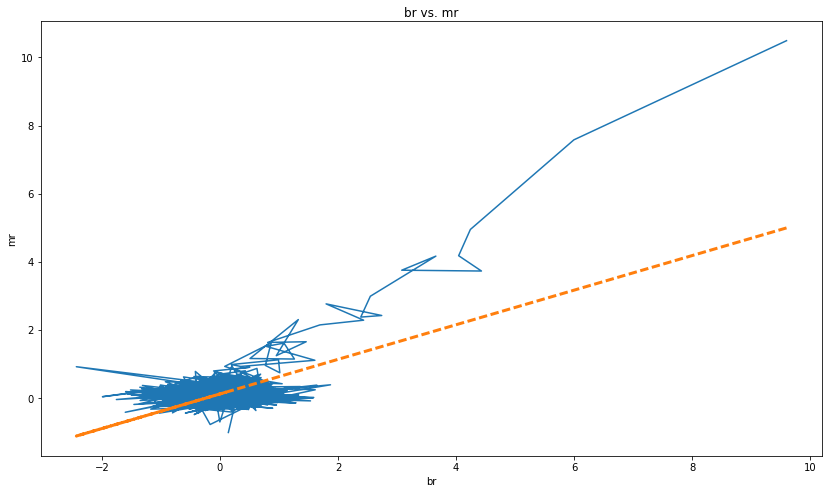

In [18]:
plot_2q('br','mr',
       lambda x: diff(x),
       lambda y: diff(y))
#xlim(0,150)
#ylim(0,150)

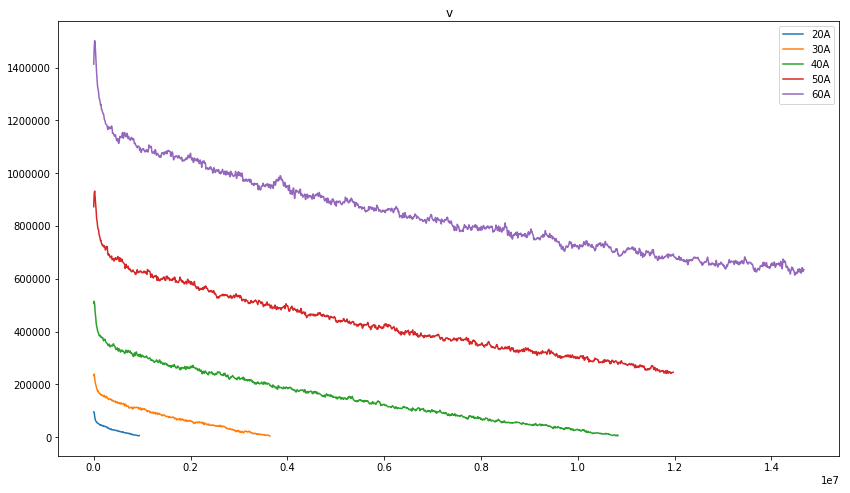

In [19]:
figure(figsize=[14,8])
ax = gca()

# Choose simulation
g = 'sph'

#Extract time
t=data[g]['t']

#Number of sims
n_sims=len(sims[g])

# Which data to plot
alias = 'v'
for i in range(n_sims):
    whichvals = data[g][alias][:,i+1] < 2e6
    ax.plot(t[whichvals],data[g][alias][whichvals,i+1],label=sims[g][i])
ax.set_title(alias)

# Plot limits
#ylim(0,90)

legend()

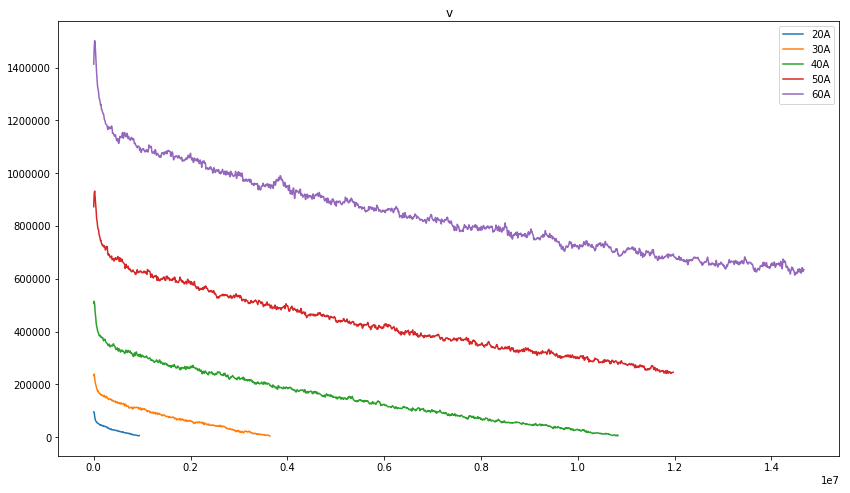

In [20]:
figure(figsize=[14,8])
ax = gca()

# Choose simulation
g = 'sph'

#Extract time
t=data[g]['t']

#Number of sims
n_sims=len(sims[g])

# Which data to plot
alias = 'v'
for i in range(n_sims):
    whichvals = data[g][alias][:,i+1] < 2e6
    ax.plot(t[whichvals],data[g][alias][whichvals,i+1],label=sims[g][i])
ax.set_title(alias)

# Plot limits
#ylim(0,90)

legend()

In [21]:
# Linear least squares
def lin_ls(xx,yy):
    # Set up system
    A = array([[sum(xx**2),sum(xx)],[sum(xx),len(xx)]])
    b = array([sum(xx*yy),sum(yy)])
    
    # Solve system using numpy.linalg.lstsq
    mm,bb = lstsq(A,b)[0]
    
    return mm,bb

In [22]:
#start_ind = where(t>1e6)[0][0]
#k_v,bb = lin_ls(t[start_ind:],v[start_ind:,3])
#k_v=-k_v
#print("kv={}".format(k_v*1e6))
#plot(t[start_ind:],v[start_ind:,3])
#plot(t[start_ind:],-k_v*t[start_ind:]+bb)

In [23]:
#print(k_v*1e6)

In [24]:
#(v[0,3]-v[-1,3])/

/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in arccos


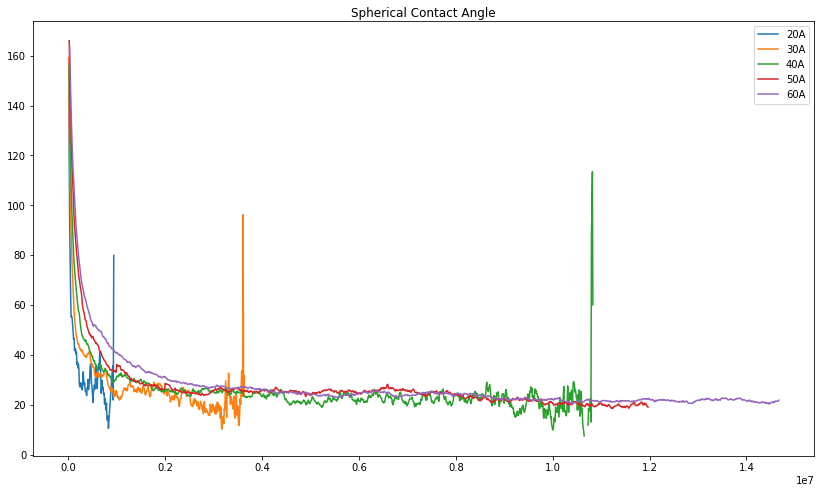

In [25]:
figure(figsize=[14,8])
ax = gca()

# Choose simulation
g = 'sph'

#Extract time
t=data[g]['t']

#Number of sims
n_sims=len(sims[g])

# Which data to plot
alias = 'ca'
for i in range(n_sims):
    whichvals = data[g][alias][:,i+1] < 2e6
    ax.plot(t[whichvals],180/pi*arccos(data[g][alias][whichvals,i+1]),label=sims[g][i])
ax.set_title('Spherical Contact Angle')

# Plot limits
#ylim(0,90)

legend()

/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in arccos


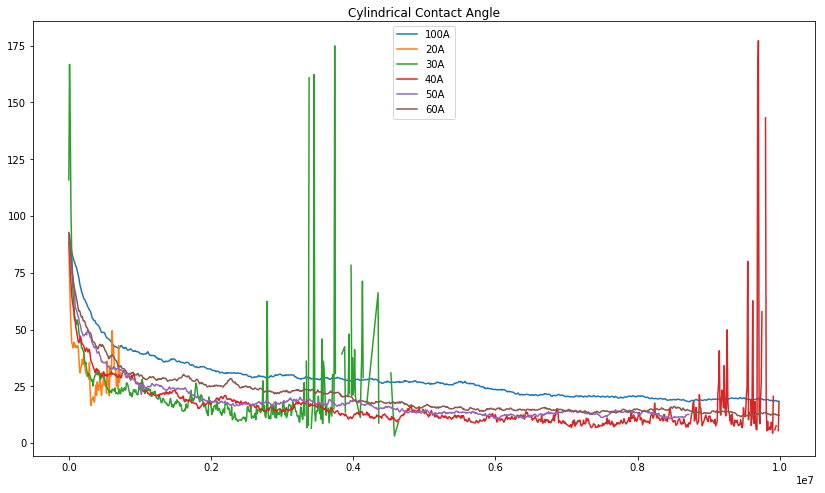

In [26]:
figure(figsize=[14,8])
ax = gca()

# Choose simulation
g = 'cyl'

#Extract time
t=data[g]['t']

#Number of sims
n_sims=len(sims[g])

# Which data to plot
alias = 'ca'
for i in range(n_sims):
    whichvals = data[g][alias][:,i+1] < 2e6
    ax.plot(t[whichvals],180/pi*arccos(data[g][alias][whichvals,i+1]),label=sims[g][i])
ax.set_title('Cylindrical Contact Angle')

# Plot limits
#ylim(0,90)

legend()

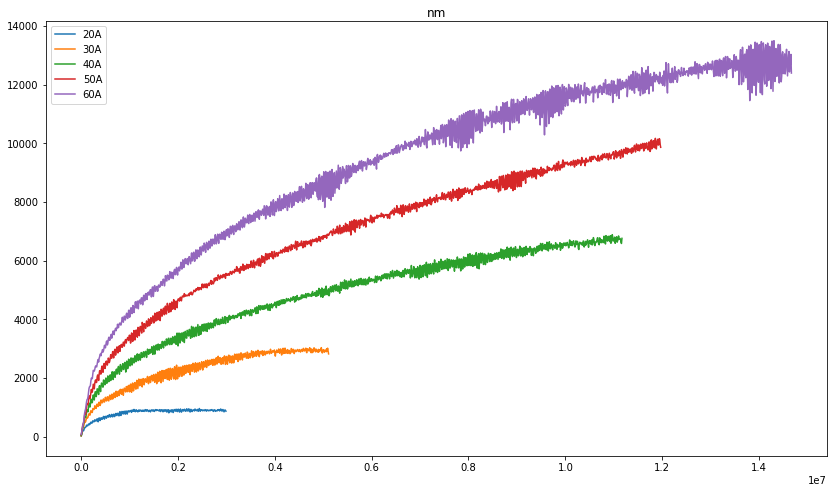

In [27]:
figure(figsize=[14,8])
ax = gca()

# Choose simulation
g = 'sph'

#Extract time
t=data[g]['t']

#Number of sims
n_sims=len(sims[g])

# Which data to plot
alias = 'nm'
for i in range(n_sims):
    whichvals = data[g][alias][:,i+1] < 2e6
    ax.plot(t[whichvals],data[g][alias][whichvals,i+1]**1,label=sims[g][i])
ax.set_title(alias)

# Plot limits
#ylim(0,90)

legend()

In [28]:
#Define plotting function
def plot_group(g):
    #Set up figure
    fig,axs=subplots(3,2)
    fig.set_figwidth(20)
    fig.set_figheight(12)
    
    #Extract time
    t=data[g]['t']
    
    #Number of sims
    n_sims=len(sims[g])
    
    #Make plots
    for qn,ax in enumerate(axs.flatten()):
        if(qn<5):
            for i in range(n_sims):
                whichvals = data[g][aliases[qn]][:,i+1] < maxvals[qn]
                ax.plot(t[whichvals],data[g][aliases[qn]][whichvals,i+1],label=sims[g][i])
            ax.set_title(quantity_names[qn])
                
        else:
            for i in range(n_sims):
                whichvals = data[g][aliases[qn]][:,i+1] < 2000000
                ax.plot(t[whichvals],data[g]['v'][whichvals,i+1],label=sims[g][i])
            ax.set_title('Bulk Volume')
        
        if qn == 2:
            ax.set_ylim(0,200)
            #title('test')
            
        
        ax.legend(loc='best')
        #Axes limits
        if(axlims[g][aliases[qn]]!=[0,0]):
            ax.set_ylim(axlims[g][aliases[qn]])
            
    fig.savefig(g+'.png',dpi=50)
    fig.savefig(g+'.eps',dpi=50)

(0, 1000000.0)

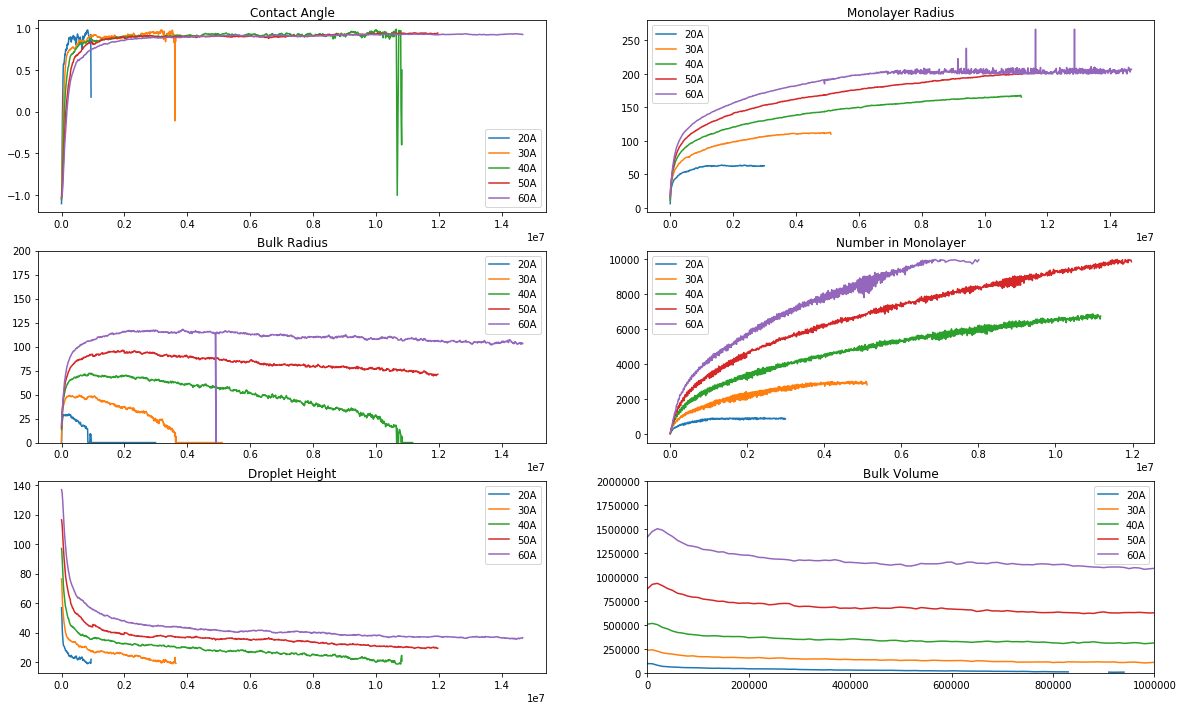

In [29]:
axlims['sph']['ad']=[0,2000000]
axlims['sph']['bv']=[]
plot_group('sph')
xlim([0,1e6])

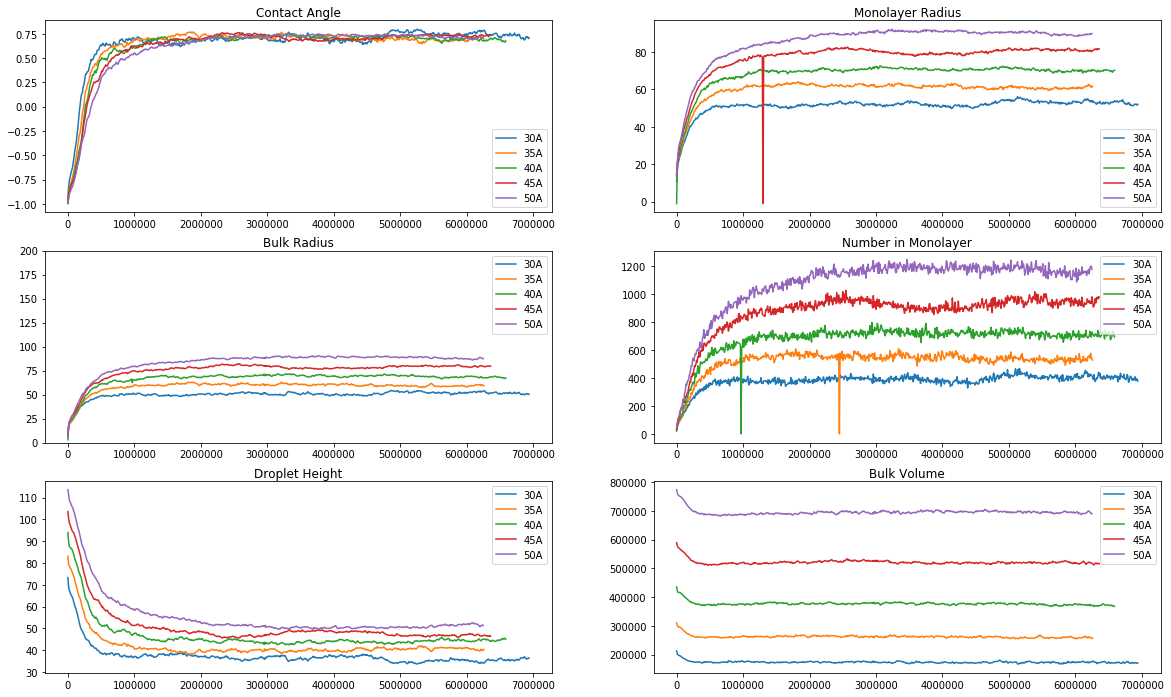

In [30]:
plot_group('quartz')

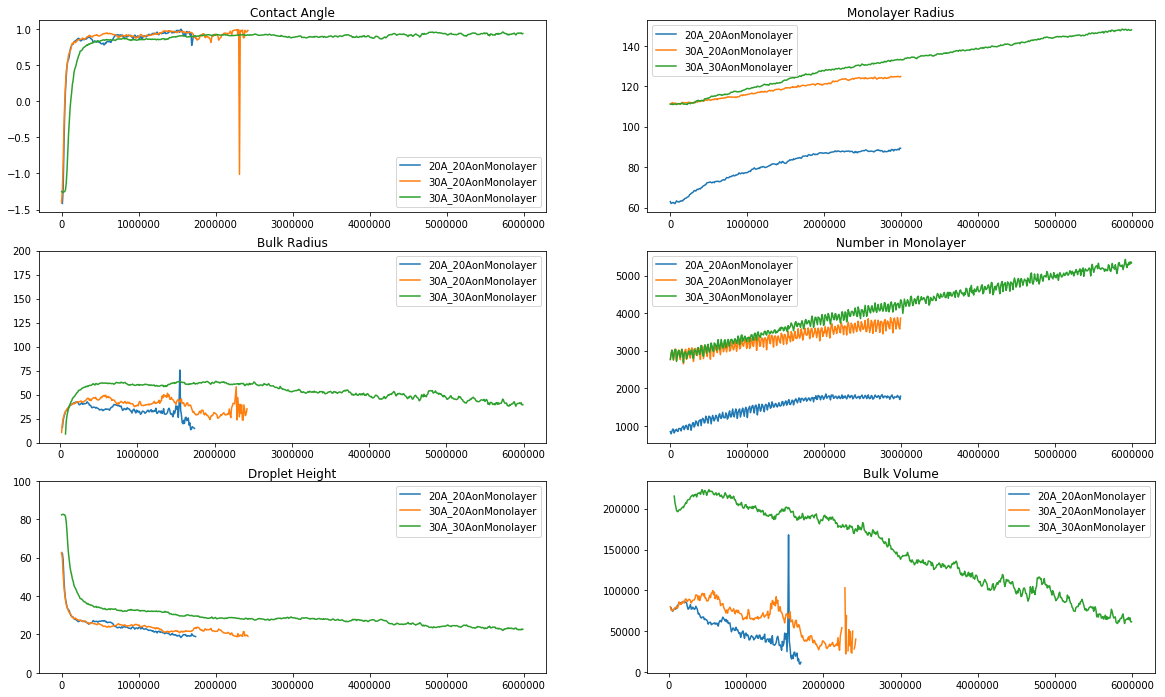

In [31]:
axlims['prewet_both']['h']=[0,100]
plot_group('prewet_both')

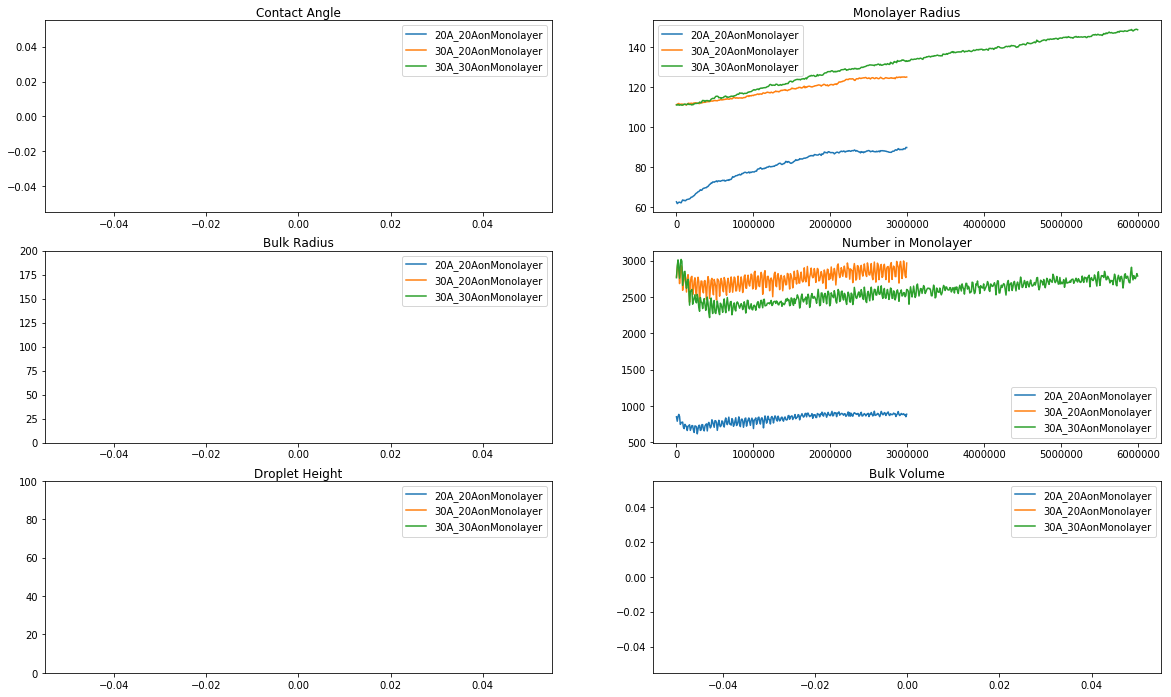

In [32]:
axlims['prewet_old']['h']=[0,100]
plot_group('prewet_old')

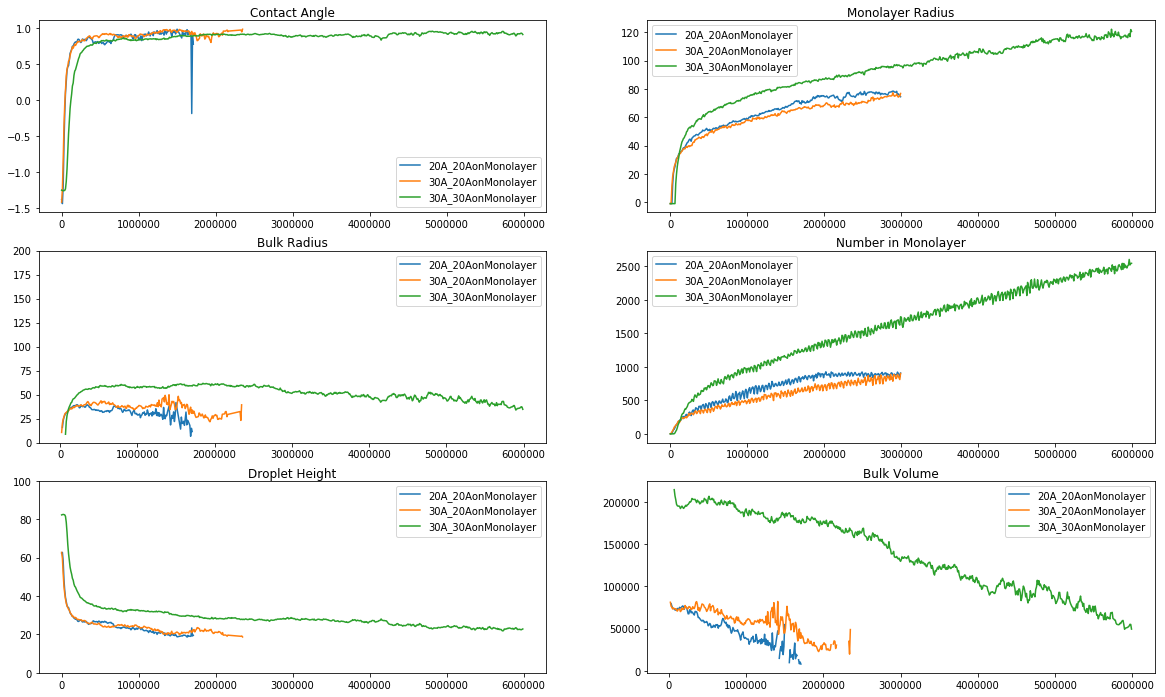

In [33]:
axlims['prewet_new']['h']=[0,100]
plot_group('prewet_new')

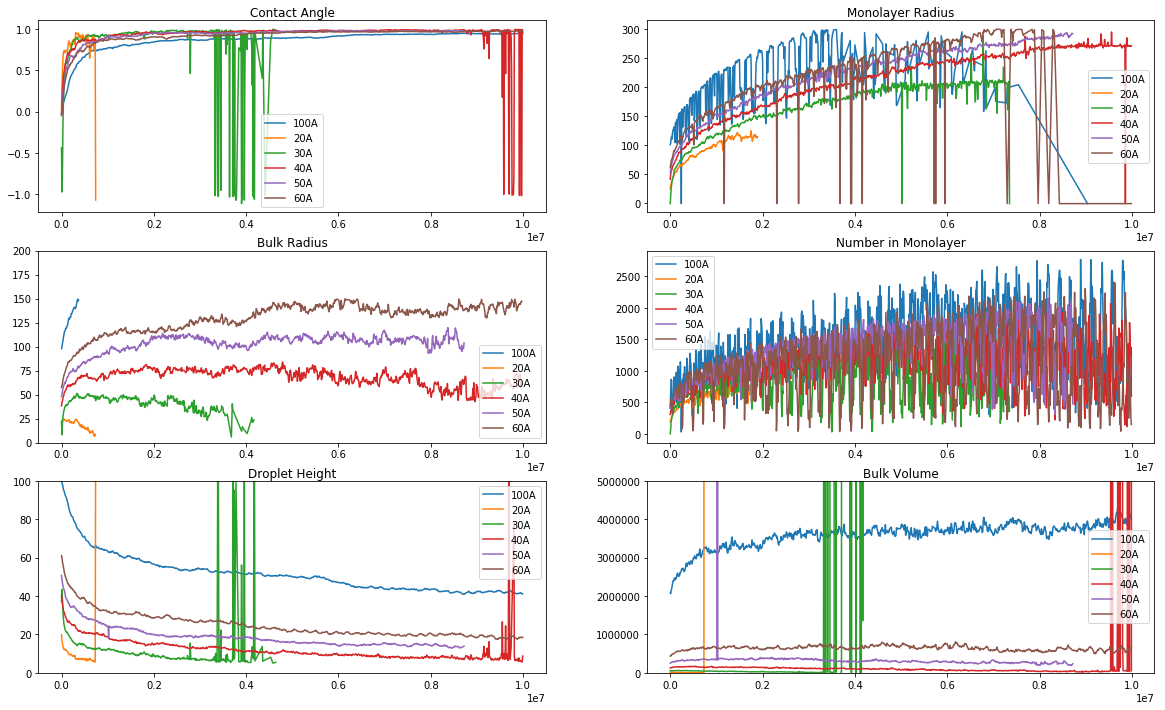

In [34]:
axlims['cyl']['h']=[0,100]
axlims['cyl']['ad']=[0,5e6]
plot_group('cyl')

In [35]:
axlims['fullcyl']['h']=[0,60]
plot_group('fullcyl')

KeyError: 'fullcyl'

In [ ]:
g='sph'
fig,axs=subplots(1,1)
fig.set_figwidth(12)
fig.set_figheight(8)
n_sims=len(sims[g])
for i in range(n_sims):
    R=int(sims[g][i][:-1])
    plot(data[g]['t'],data[g]['mr'][:,i+1],label=sims[g][i])
    #plot(data[g]['t'],data[g]['v'][:,i+1],label=sims[g][i-1])
    
legend(loc='best')
#xlim([0,2e6])
#ylim(0,10000)
xlabel("t")
ylabel("h/V")

In [ ]:
g='sph'
t=data[g]['t']
fig,axs=subplots(1,1)
fig.set_figwidth(12)
fig.set_figheight(8)
n_sims=len(sims[g])
for i in range(n_sims):
    R=int(sims[g][i][:-1])
    V0=4/3*pi*R**3
    plot(t,data[g]['v'][:,i+1]/(V0),label=sims[g][i])
    #plot(data[g]['t'],data[g]['v'][:,i+1],label=sims[g][i-1])
    
legend(loc='best')
#xlim([0,2e6])
#ylim(0,5e-5)
xlabel("t")
#ylabel("h/V")

In [ ]:
g='sph'
fig,axs=subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(8)
n_sims=len(sims[g])
t=data[g]['t']
for i in range(n_sims):
    R=int(sims[g][i][:-1])
    axs[0].plot(data[g]['t'],data[g]['br'][:,i+1],label=sims[g][i])
    axs[1].plot(t,R*t**(1/4)*exp(-t/(R**(1/2)*1e6)),label=sims[g][i])
    #plot(data[g]['t'],data[g]['v'][:,i+1],label=sims[g][i-1])
    
axs[0].legend(loc='best')
axs[1].legend(loc='best')
#xlim([0,2e6])
#ylim(0,10000)
xlabel("t")
ylabel("h")

In [ ]:
figure(figsize=[12,8])
plot(data['sph']['t'],data['sph']['br'][:,2],label='30A Dry Bulk')
plot(data['prewet_both']['t']-7e4,data['prewet_both']['br'][:,3],label='30A Prewet Bulk')
plot(data['sph']['t'],data['sph']['mr'][:,2],label='30A Dry Mono')
plot(data['prewet_both']['t']-7e4,data['prewet_both']['mr'][:,3],label='30A Prewet Mono')
xlim(0,3e5)
legend(loc='best')